In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

%matplotlib inline

In [10]:
if not '../../data/osha/osha_norm_naics.csv':
    with zipfile.ZipFile('../../data/osha/osha_norm_naics.zip','r') as zfile:
        zfile.extractall('../../data/osha')
osha = pd.read_csv('../../data/osha/osha_norm_naics.csv', dtype={'naics_code':str, 'sic_code':str},
                  na_values = ["", " ","NaN", "nan", "NA", "na", "Na"])
osha = osha[['date_sampled','inspection_number', 'establishment_name', 'preferred_name','naics_unified', 'sector_name', 'subsector_name',
             'industry_group_name', 'conc_mgm3', 'sample_result', 'unit_of_measurement']]  # keep only cols we need
osha['date_sampled'] = osha['date_sampled'].str.slice(0,4).astype(int)
osha = osha[~osha['sector_name'].isin(["Undefined/Multiple"])]
#osha = osha.drop(osha[osha['conc_mgm3']>10000].index)
osha = osha.dropna(subset=['conc_mgm3', 'sector_name'])
#osha['sector_enc'] = osha['sector_name'].astype('category').cat.codes
#osha['subsector_enc'] = osha['subsector_name'].astype('category').cat.codes
#osha['industry_group_enc'] = osha['industry_group_name'].astype('category').cat.codes
#osha['detected'] = np.where(osha['conc_mgm3'] > 0, 1, 0)

In [11]:
osha[osha['conc_mgm3']>1000000]

,date_sampled,inspection_number,establishment_name,preferred_name,naics_unified,sector_name,subsector_name,industry_group_name,conc_mgm3,sample_result,unit_of_measurement
503,1984,882415,MIDDLE STATES STEEL COMPANY,Lead,237310,Construction,Heavy and Civil Engineering Construction,"Highway, Street, and Bridge Construction",1.694888e+06,20.0000,%
512,1984,886390,AMERICAN PAINTING COMPANY,Lead,238***,Construction,Specialty Trade Contractors,Undefined/Multiple,2.542331e+06,30.0000,%
898,1984,1124114,"NORTHEAST INDUSTRIAL BATTERIES, INC.",Lead,335912,Manufacturing,"Electrical Equipment, Appliance, and Component...",Other Electrical Equipment and Component Manuf...,3.389775e+06,40.0000,%
1019,1984,1148493,LEECH INC,Lead,331491,Manufacturing,Primary Metal Manufacturing,Nonferrous Metal (except Aluminum) Production ...,1.016933e+06,12.0000,%
1424,1984,1306588,SENSOTEC INC,Lead,33****,Manufacturing,Undefined/Multiple,Undefined/Multiple,8.451387e+06,99.7280,%
...,...,...,...,...,...,...,...,...,...,...,...
1261711,2001,303391833,"ORGO-THERMIT, INC.",Manganese,33****,Manufacturing,Undefined/Multiple,Undefined/Multiple,1.797564e+06,80.0000,%
1261786,2011,315628743,INNER SPACE CAVERNS,Calcium carbonate,712190,"Arts, Entertainment, and Recreation","Museums, Historical Sites, and Similar Institu...","Museums, Historical Sites, and Similar Institu...",3.875768e+06,94.6811,%
1261855,2002,305448235,"FOREST PHARMACEUTICALS, INC.",Levothyroxine,325412,Manufacturing,Chemical Manufacturing,Pharmaceutical and Medicine Manufacturing,3.148802e+07,99.1000,%
1262237,2003,306258625,ENVIRONMENTAL MAINTENANCE INTERNATIONAL,Pentaethylene glycol,325998,Manufacturing,Chemical Manufacturing,Other Chemical Product and Preparation Manufac...,1.804886e+06,18.5200,%


In [21]:
len(osha[osha['preferred_name']=='Levothyroxine'])

5

In [22]:
osha[osha['preferred_name']=='Levothyroxine']

,date_sampled,inspection_number,establishment_name,preferred_name,naics_unified,sector_name,subsector_name,industry_group_name,conc_mgm3,sample_result,unit_of_measurement
1261853,2002,305448235,"FOREST PHARMACEUTICALS, INC.",Levothyroxine,325412,Manufacturing,Chemical Manufacturing,Pharmaceutical and Medicine Manufacturing,3.500000e-02,0.035,M
1261854,2002,305448235,"FOREST PHARMACEUTICALS, INC.",Levothyroxine,325412,Manufacturing,Chemical Manufacturing,Pharmaceutical and Medicine Manufacturing,3.600000e-02,0.036,M
1261855,2002,305448235,"FOREST PHARMACEUTICALS, INC.",Levothyroxine,325412,Manufacturing,Chemical Manufacturing,Pharmaceutical and Medicine Manufacturing,3.148802e+07,99.100,%
1261856,2002,305448235,"FOREST PHARMACEUTICALS, INC.",Levothyroxine,325412,Manufacturing,Chemical Manufacturing,Pharmaceutical and Medicine Manufacturing,1.500000e-02,0.015,M
1261857,2002,305448235,"FOREST PHARMACEUTICALS, INC.",Levothyroxine,325412,Manufacturing,Chemical Manufacturing,Pharmaceutical and Medicine Manufacturing,1.600000e-02,0.016,M


In [15]:
len(osha[(osha['unit_of_measurement']=="%") & (osha['sample_result'] > 15)])

16361

In [7]:
osha.loc[1261855,:]

date_sampled                                                2002
inspection_number                                      305448235
establishment_name                  FOREST PHARMACEUTICALS, INC.
preferred_name                                     Levothyroxine
naics_unified                                             325412
sector_name                                        Manufacturing
subsector_name                            Chemical Manufacturing
industry_group_name    Pharmaceutical and Medicine Manufacturing
conc_mgm3                                             3.1488e+07
Name: 1261855, dtype: object

(array([6.7231e+04, 3.0000e+00, 1.0000e+00, 2.0000e+01, 1.2400e+02,
        5.1300e+02, 1.1320e+03, 2.4790e+03, 4.4410e+03, 4.8350e+03,
        4.7470e+03, 3.9630e+03, 3.2910e+03, 2.3560e+03, 1.7520e+03,
        1.1550e+03, 8.0700e+02, 5.5600e+02, 4.4500e+02, 2.8800e+02,
        1.9500e+02, 1.4200e+02, 6.5000e+01, 4.3000e+01, 3.0000e+01,
        6.9000e+01, 1.1100e+02, 1.8300e+02, 4.4600e+02, 4.8300e+02,
        5.9600e+02, 6.6400e+02, 7.6200e+02, 5.5300e+02, 6.4600e+02,
        3.7600e+02, 6.7200e+02, 6.0500e+02, 7.0500e+02, 4.6600e+02,
        7.2400e+02, 3.0800e+02, 1.1900e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-9.21034037, -8.62187378, -8.03340718, -7.44494059, -6.85647399,
        -6.2680074 , -5.6795408 , -5.09107421, -4.50260761, -3.91414102,
        -3.32567442, -2.73720783, -2.14874123, -1.56027464, -0.97180804,
        -0.38334145,  0.20512515,  0.79359174,  1.38205834,  1.97052493,
         2.55899153,  3.14

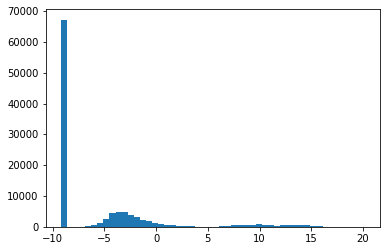

In [20]:
plt.hist(np.log(osha.loc[osha['preferred_name'] == 'Lead','conc_mgm3']+0.0001),bins=50)

In [4]:
osha = osha.groupby(['inspection_number', 'establishment_name', 'preferred_name','naics_unified', 'sector_name',
                     'subsector_name', 'industry_group_name'], as_index=False).mean(numeric_only=True)
osha.head(6)

,inspection_number,establishment_name,preferred_name,naics_unified,sector_name,subsector_name,industry_group_name,date_sampled,conc_mgm3,detected
0,29067,"GARMAT USA, INC.",Iron oxide,332322,Manufacturing,Fabricated Metal Product Manufacturing,Architectural and Structural Metals Manufacturing,2011,1.959734,1
1,29206,Polar Corporation,Iron oxide,811310,Other Services,Repair and Maintenance,Commercial and Industrial Machinery and Equipm...,2011,12.966245,1
2,29251,"Jobsite, Inc.",Iron oxide,333517,Manufacturing,Machinery Manufacturing,Metalworking Machinery Manufacturing,2011,0.519814,1
3,29479,"TIC, The Industrial Company",Iron oxide,236210,Construction,Construction of Buildings,Nonresidential Building Construction,2011,0.080790,1
4,63156,Nomad Global Communication Solutions,Iron oxide,334290,Manufacturing,Computer and Electronic Product Manufacturing,Communications Equipment Manufacturing,2011,3.093908,1
5,63259,"PRECISION PLATING COMPANY, INC.",Iron oxide,332813,Manufacturing,Fabricated Metal Product Manufacturing,"Coating, Engraving, Heat Treating, and Allied ...",2011,0.000000,0


In [92]:
len(osha)

233975

### Opera abiotic properties ONLY

In [6]:
opera = pd.read_csv('../../data/osha/chemical_metadata/opera2_physical.csv')
opera

,PREFERRED_NAME,MoleculeID,LogP_pred,MP_pred,BP_pred,LogVP_pred,LogWS_pred,LogHL_pred,RT_pred,LogKOA_pred,LogD55_pred,LogD74_pred,LogOH_pred,LogKoc_pred
0,"1,1,1,2-Tetrafluoroethane",DTXSID1021324,0.827040,-102.840618,-22.605931,3.539329,-2.918477,-1.308825,1.077754,0.036410,0.827040,0.827040,-14.241688,1.602622
1,"1,1,1-Trichloro-2,2,2-trifluoroethane",DTXSID5027148,2.577394,-15.002823,48.806711,2.765054,-2.226180,-0.825878,11.526084,2.294088,2.577394,2.577394,-15.276176,1.861776
2,"1,2-Difluoro-1,1,2,2-tetrachloroethane",DTXSID5026091,3.042323,24.586119,91.183236,1.878533,-3.075882,-0.782740,12.076823,3.710297,3.042323,3.042323,-14.523127,1.994880
3,"1,1,2,2-Tetrachloroethane",DTXSID7021318,2.350099,-39.864348,147.582052,0.862776,-1.754303,-3.300416,10.683509,3.464204,2.350099,2.350099,-12.884900,1.894347
4,"1,1,2-Trichloro-1,2,2-trifluoroethane",DTXSID6021377,2.966338,-44.225351,50.560073,2.682974,-2.994329,-1.081953,8.322817,2.818690,2.966338,2.966338,-15.292594,1.861775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,4-Vinyl-1-cyclohexene dioxide,DTXSID0020604,0.670876,75.401822,221.813643,-1.583812,-0.246298,-4.695892,6.542498,4.306213,0.670876,0.670876,-10.711082,1.762055
729,"1,1-Dichloroethylene",DTXSID8021438,2.146029,-92.054831,41.134842,2.521820,-1.435674,-2.074198,0.000000,2.597997,2.146029,2.146029,-10.958900,1.780304
730,Oxamyl,DTXSID6021086,-0.537842,100.495968,306.162430,-3.848174,-0.203799,-9.882354,2.713181,9.225506,-0.540338,-0.537873,-11.234750,1.099346
731,Warfarin,DTXSID5023742,2.688832,162.602197,398.372135,-7.143559,-4.253120,-8.942250,16.801856,10.660081,2.688832,2.688832,-10.475345,2.965329


In [9]:
from sklearn.preprocessing import scale

opera = opera.drop(columns=['MoleculeID'])
#chem_data[chem_data.columns[8:]] = chem_data[chem_data.columns[8:]].apply(pd.to_numeric,errors='coerce')
opera.columns = [x.lower() for x in opera.columns]
opera_cols =  opera.columns[1:]
opera_s = opera.copy()
opera_s[opera_cols] =  scale(opera_s[opera_cols])  # center and scale opera predictors

In [12]:
#opera_s = opera_s.drop(columns=['octanol_air_partition_coeff_logkoa_opera_pred','melting_point_degc_opera_pred']) # drop highly correlated predictors
opera_cols = opera_s.columns.tolist()
opera_cols.remove('preferred_name')

chem_osha = osha.merge(opera_s, left_on='preferred_name', right_on='preferred_name')
chem_osha = chem_osha.dropna(subset=opera_cols)  # drop rows missing opera predictions
osha_enc = chem_osha.dropna(subset=['subsector_name'])
osha_enc = osha_enc.drop(osha_enc[osha_enc['subsector_name']=='Undefined/Multiple'].index)
osha_enc['sector_enc'] = osha_enc['sector_name'].astype('category').cat.codes  # re-factor
osha_enc['subsector_enc'] = osha_enc ['subsector_name'].astype('category').cat.codes  # re-factor
len(osha_enc.sector_name.value_counts()), len(osha_enc.subsector_name.value_counts())

(20, 91)

In [96]:
#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(interaction_only=True, include_bias=False)
#opera_s_ints = poly.fit_transform(osha_enc[opera_cols])
#opera_cols_ints = poly.get_feature_names()[10:]
#opera_interactions = pd.DataFrame(opera_s_ints[:,10:], columns=opera_cols_ints, index=osha_enc.index)
#osha_enc = osha_enc.join(opera_interactions)

In [15]:
sector_index = osha_enc.groupby(['sector_name']).all().reset_index().reset_index()[['index', 'sector_name']]
sector_subsector_index = osha_enc.groupby(['sector_name', 'subsector_name']).all().reset_index().reset_index()[['index', 'sector_name', 'subsector_name']]
sector_subsector_indexes_df = pd.merge(sector_index, sector_subsector_index, how='inner', on='sector_name', suffixes=('_s', '_ss'))
indexed_osha = pd.merge(osha_enc, sector_subsector_indexes_df, how = 'inner', on=['sector_name', 'subsector_name']).reset_index()

sector_indexes = sector_index['index'].values
sector_count = len(sector_indexes)
sector_subsector_indexes = sector_subsector_indexes_df['index_ss'].values
sector_subsector_count = len(sector_subsector_indexes)

#from sklearn.model_selection import train_test_split
#indexed_osha, indexed_osha_test = train_test_split(indexed_osha, test_size=0.1, random_state=5757)  # training/test dataset split completely random

indexed_osha_test = indexed_osha[indexed_osha['date_sampled'].isin(['1990','1995','2005' '2015'])]  # training/test dataset split by year
indexed_osha = indexed_osha[~(indexed_osha['date_sampled'].isin(['1990','1995','2005' '2015']))]

In [17]:
preds = indexed_osha[opera_cols]
npreds = len(opera_cols)

from theano import tensor as tt
from theano import shared

detected_shared = shared(indexed_osha.detected.values)
preds_shared = shared(preds.as_matrix())
index_s_shared = shared(indexed_osha.index_s.values)
index_ss_shared = shared(indexed_osha.index_ss.values)


with pm.Model() as osha_logistic_physical:
    
    global_mu = pm.StudentT('global_mu', nu=5, mu=0, sigma=10)
    global_lam = pm.HalfCauchy('global_lam',beta=25)
    
    sector_int_mu = pm.StudentT("sector_int_mu",nu = 5, mu = global_mu, sigma=global_lam, shape=sector_count)

    sigma_subsector_int = pm.HalfCauchy('sigma_subsector_int',beta=25)
    
    subsector_int = pm.StudentT("subsector_int", 1, mu=sector_int_mu[sector_subsector_indexes_df['index_s']],
                          sigma=sigma_subsector_int, shape=sector_subsector_count)
    beta = pm.StudentT('beta',nu=5,mu=0,sigma=2.5, shape=(npreds))  # recommended by stan wiki, Gelman et al 2008
    μ = subsector_int[index_ss_shared] + tt.dot(preds_shared,beta)
    
    θ = pm.Deterministic('θ',pm.math.sigmoid(μ))
    
    like = pm.Bernoulli(
        'likelihood',
        p = θ,
        observed=detected_shared
    )

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [19]:
with osha_logistic_physical:
    fr_advi = pm.FullRankADVI()
tracker = pm.callbacks.Tracker(
    mean=fr_advi.approx.mean.eval,  # callable that returns mean
    std=fr_advi.approx.std.eval  # callable that returns std
)
fit = fr_advi.fit(100000, callbacks=[pm.callbacks.CheckParametersConvergence(), tracker])
#fit = fr_advi.fit(50000, callbacks=[pm.callbacks.CheckParametersConvergence(), tracker])


  0%|          | 0/100000 [00:00<?, ?it/s]/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple seq

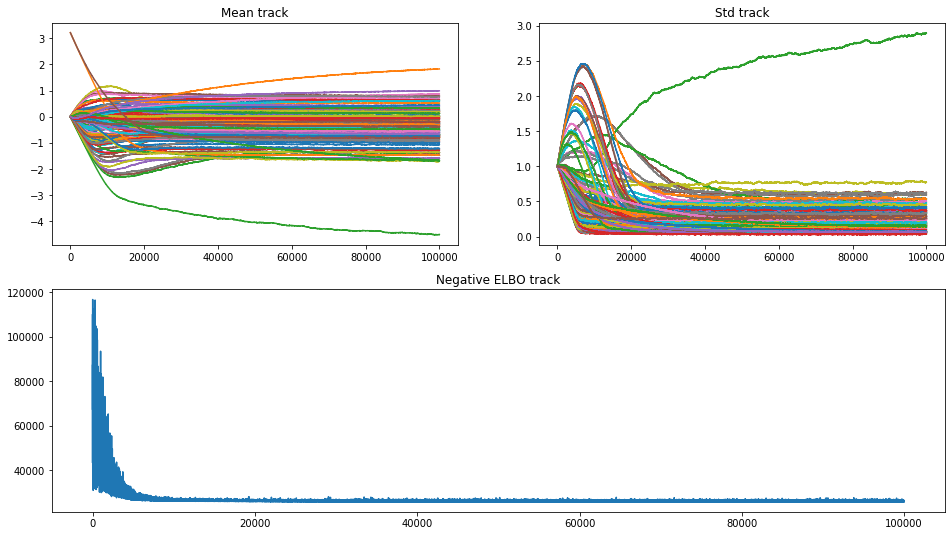

In [20]:
fig = plt.figure(figsize=(16, 9))
mu_ax = fig.add_subplot(221)
std_ax = fig.add_subplot(222)
hist_ax = fig.add_subplot(212)
mu_ax.plot(tracker['mean'])
mu_ax.set_title('Mean track')
std_ax.plot(tracker['std'])
std_ax.set_title('Std track')
hist_ax.plot(fit.hist)
hist_ax.set_title('Negative ELBO track');

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


<Figure size 432x1152 with 0 Axes>

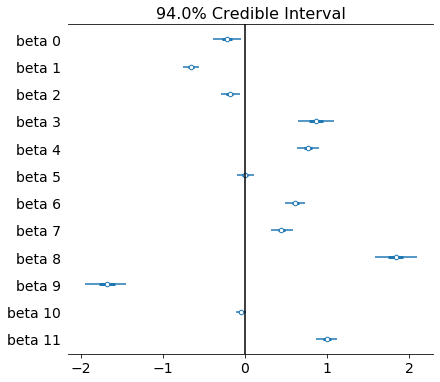

In [21]:
from pymc3 import forestplot
plt.figure(figsize=(6,16))
#forestplot(mean_field.sample(1000), kind='ridgeplot', colors='white', var_names=['beta']);
forestplot(fit.sample(1000), var_names=['beta']);
plt.axvline(x=0, color='black')

In [23]:
for i, var in enumerate(opera_cols):
    print('beta {}: {}'.format(i,var))

beta 0: logp_pred
beta 1: mp_pred
beta 2: bp_pred
beta 3: logvp_pred
beta 4: logws_pred
beta 5: loghl_pred
beta 6: rt_pred
beta 7: logkoa_pred
beta 8: logd55_pred
beta 9: logd74_pred
beta 10: logoh_pred
beta 11: logkoc_pred


## Posterior predictive checks

#### Average across 500 sets of probablistic predictions

In [26]:
ppc = pm.sample_posterior_predictive(fit.sample(1000), samples= 500, model=osha_logistic_physical)
avg_predictions = np.where(ppc['likelihood'].mean(axis=0) >= 0.5, 1, 0)

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
100%|██████████| 500/500 [00:07<00:00, 65.51it/s]


#### Classification accuracy metrics

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score
accuracy = accuracy_score(avg_predictions, indexed_osha['detected'])
auc = roc_auc_score(avg_predictions, indexed_osha['detected'])
print('Training classification accuracy: {:.2f}'.format(accuracy))
print('Training ROC area under the curve: {:.2f}'.format(auc))

Training classification accuracy: 0.70
Training ROC area under the curve: 0.68


In [28]:
null_predictions = np.where(np.random.uniform(size=len(indexed_osha['detected'])) >
                                        indexed_osha['detected'].mean(),1,0)
null_accuracy = accuracy_score(null_predictions,indexed_osha['detected'])
null_auc = roc_auc_score(null_predictions, indexed_osha['detected'])
print('Null model training classification accuracy: {:.2f}'.format(null_accuracy))
print('Null model training ROC area under the curve: {:.2f}'.format(null_auc))

Null model training classification accuracy: 0.47
Null model training ROC area under the curve: 0.50


#### Actual vs predicted subsector detection frequency

In [29]:
subsector_probs = indexed_osha[['detected', 'index_ss']].copy()
subsector_probs['prob_predicted'] = avg_predictions
subsector_probs = subsector_probs.groupby('index_ss').mean()
subsector_counts = indexed_osha['index_ss'].value_counts()
#subsector_probs = subsector_probs[subsector_counts > 10] # drop subsectors with very few data points
r = np.corrcoef(subsector_probs['detected'], subsector_probs['prob_predicted'])[0,1]

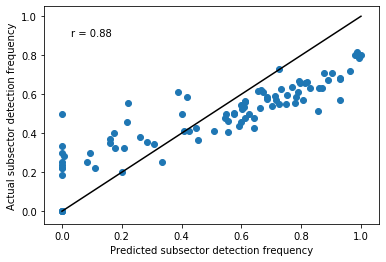

In [30]:
plt.scatter( subsector_probs['prob_predicted'], subsector_probs['detected'])
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('Predicted subsector detection frequency')
plt.ylabel('Actual subsector detection frequency')
plt.text(0.03, 0.9, 'r = {:.2f}'.format(r))
plt.show()

#### Test set accuracy

In [31]:
preds_test = indexed_osha_test[opera_cols]
detected_shared.set_value(indexed_osha_test.detected.values)
preds_shared.set_value(preds_test.as_matrix())
index_s_shared.set_value(indexed_osha_test.index_s.values)
index_ss_shared.set_value(indexed_osha_test.index_ss.values)

ppc_test = pm.sample_posterior_predictive(fit.sample(1000), samples= 500, model=osha_logistic_physical)
avg_predictions_test = np.where(ppc_test['likelihood'].mean(axis=0) >= 0.5, 1, 0)

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
100%|██████████| 500/500 [00:05<00:00, 89.73it/s]


In [32]:
accuracy = accuracy_score(avg_predictions_test, indexed_osha_test['detected'])
null_predictions_test = np.where(np.random.uniform(size=len(indexed_osha_test['detected'])) >
                                        indexed_osha_test['detected'].mean(),1,0)
null_accuracy = accuracy_score(null_predictions_test,indexed_osha_test['detected'])
auc = roc_auc_score(avg_predictions_test, indexed_osha_test['detected'])
null_auc = roc_auc_score(null_predictions_test, indexed_osha_test['detected'])
print('Test classification accuracy: {:.2f}'.format(accuracy))
print('Null model test classification accuracy: {:.2f}'.format(null_accuracy))
print('Test ROC area under the curve: {:.2f}'.format(auc))
print('Null model test ROC area under the curve: {:.2f}'.format(null_auc))


Test classification accuracy: 0.70
Null model test classification accuracy: 0.46
Test ROC area under the curve: 0.67
Null model test ROC area under the curve: 0.50


/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


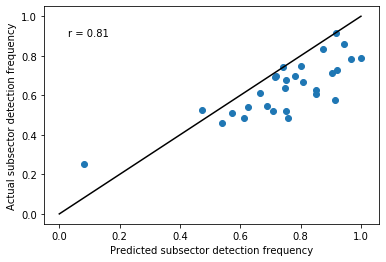

In [33]:
subsector_probs_test = indexed_osha_test[['detected', 'index_ss']].copy()
subsector_probs_test['prob_predicted'] = avg_predictions_test
subsector_probs_test = subsector_probs_test.groupby('index_ss').mean()
subsector_counts_test = indexed_osha_test['index_ss'].value_counts()
subsector_probs_test = subsector_probs_test[subsector_counts_test > 10] # drop subsectors with very few data points
r = np.corrcoef(subsector_probs_test['detected'], subsector_probs_test['prob_predicted'])[0,1]

plt.scatter(subsector_probs_test['prob_predicted'], subsector_probs_test['detected'])
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('Predicted subsector detection frequency')
plt.ylabel('Actual subsector detection frequency')
plt.text(0.03, 0.9, 'r = {:.2f}'.format(r))
plt.show()

## Opera abiotic properties + biological properties

In [44]:
opera = pd.read_csv('../../data/osha/chemical_metadata/opera2_physical_biological.csv')
opera

,PREFERRED_NAME,MoleculeID,LogP_pred,MP_pred,BP_pred,LogVP_pred,LogWS_pred,LogHL_pred,RT_pred,LogKOA_pred,LogD55_pred,LogD74_pred,LogOH_pred,LogKoc_pred,LogBCF_pred,BioDeg_LogHalfLife_pred,ReadyBiodeg_pred,LogKM_pred,FUB_pred,Clint_pred
0,"1,1,1,2-Tetrafluoroethane",DTXSID1021324,0.827040,-102.840618,-22.605931,3.539329,-2.918477,-1.308825,1.077754,0.036410,0.827040,0.827040,-14.241688,1.602622,1.140721,0.879337,1.0,-1.018823,0.938953,1.126115
1,"1,1,1-Trichloro-2,2,2-trifluoroethane",DTXSID5027148,2.577394,-15.002823,48.806711,2.765054,-2.226180,-0.825878,11.526084,2.294088,2.577394,2.577394,-15.276176,1.861776,1.219245,0.879336,0.0,1.100178,0.682392,1.053753
2,"1,2-Difluoro-1,1,2,2-tetrachloroethane",DTXSID5026091,3.042323,24.586119,91.183236,1.878533,-3.075882,-0.782740,12.076823,3.710297,3.042323,3.042323,-14.523127,1.994880,1.651911,1.147999,0.0,0.680101,0.505783,1.127796
3,"1,1,2,2-Tetrachloroethane",DTXSID7021318,2.350099,-39.864348,147.582052,0.862776,-1.754303,-3.300416,10.683509,3.464204,2.350099,2.350099,-12.884900,1.894347,1.071377,1.162160,0.0,-0.678153,0.101371,1.049232
4,"1,1,2-Trichloro-1,2,2-trifluoroethane",DTXSID6021377,2.966338,-44.225351,50.560073,2.682974,-2.994329,-1.081953,8.322817,2.818690,2.966338,2.966338,-15.292594,1.861775,1.624601,0.670627,0.0,1.087855,0.872214,1.053753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,4-Vinyl-1-cyclohexene dioxide,DTXSID0020604,0.670876,75.401822,221.813643,-1.583812,-0.246298,-4.695892,6.542498,4.306213,0.670876,0.670876,-10.711082,1.762055,0.544835,0.563320,0.0,-0.845404,0.752539,-4.002069
729,"1,1-Dichloroethylene",DTXSID8021438,2.146029,-92.054831,41.134842,2.521820,-1.435674,-2.074198,0.000000,2.597997,2.146029,2.146029,-10.958900,1.780304,1.036647,0.901319,0.0,-0.756178,0.342199,1.094112
730,Oxamyl,DTXSID6021086,-0.537842,100.495968,306.162430,-3.848174,-0.203799,-9.882354,2.713181,9.225506,-0.540338,-0.537873,-11.234750,1.099346,0.330434,0.668337,0.0,-1.028647,0.807243,-6.611441
731,Warfarin,DTXSID5023742,2.688832,162.602197,398.372135,-7.143559,-4.253120,-8.942250,16.801856,10.660081,2.688832,2.688832,-10.475345,2.965329,1.250233,0.525285,0.0,-0.388300,0.014048,-5.274753


In [45]:
from sklearn.preprocessing import scale

opera = opera.drop(columns=['MoleculeID'])
#chem_data[chem_data.columns[8:]] = chem_data[chem_data.columns[8:]].apply(pd.to_numeric,errors='coerce')
opera.columns = [x.lower() for x in opera.columns]
opera_cols =  opera.columns[1:]
opera_s = opera.copy()
center_scale_cols = opera_cols.tolist().copy()
center_scale_cols.remove('readybiodeg_pred')
opera_s[center_scale_cols] =  scale(opera_s[center_scale_cols])  # center and scale opera predictors

In [46]:
#opera_s = opera_s.drop(columns=['octanol_air_partition_coeff_logkoa_opera_pred','melting_point_degc_opera_pred']) # drop highly correlated predictors
opera_cols = opera_s.columns.tolist()
opera_cols.remove('preferred_name')

chem_osha = osha.merge(opera_s, left_on='preferred_name', right_on='preferred_name')
chem_osha = chem_osha.dropna(subset=opera_cols)  # drop rows missing opera predictions
osha_enc = chem_osha.dropna(subset=['subsector_name'])
osha_enc = osha_enc.drop(osha_enc[osha_enc['subsector_name']=='Undefined/Multiple'].index)
osha_enc['sector_enc'] = osha_enc['sector_name'].astype('category').cat.codes  # re-factor
osha_enc['subsector_enc'] = osha_enc ['subsector_name'].astype('category').cat.codes  # re-factor
len(osha_enc.sector_name.value_counts()), len(osha_enc.subsector_name.value_counts())

(20, 91)

In [96]:
#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(interaction_only=True, include_bias=False)
#opera_s_ints = poly.fit_transform(osha_enc[opera_cols])
#opera_cols_ints = poly.get_feature_names()[10:]
#opera_interactions = pd.DataFrame(opera_s_ints[:,10:], columns=opera_cols_ints, index=osha_enc.index)
#osha_enc = osha_enc.join(opera_interactions)

In [48]:
sector_index = osha_enc.groupby(['sector_name']).all().reset_index().reset_index()[['index', 'sector_name']]
sector_subsector_index = osha_enc.groupby(['sector_name', 'subsector_name']).all().reset_index().reset_index()[['index', 'sector_name', 'subsector_name']]
sector_subsector_indexes_df = pd.merge(sector_index, sector_subsector_index, how='inner', on='sector_name', suffixes=('_s', '_ss'))
indexed_osha = pd.merge(osha_enc, sector_subsector_indexes_df, how = 'inner', on=['sector_name', 'subsector_name']).reset_index()

sector_indexes = sector_index['index'].values
sector_count = len(sector_indexes)
sector_subsector_indexes = sector_subsector_indexes_df['index_ss'].values
sector_subsector_count = len(sector_subsector_indexes)

#from sklearn.model_selection import train_test_split
#indexed_osha, indexed_osha_test = train_test_split(indexed_osha, test_size=0.1, random_state=5757)  # training/test dataset split completely random

indexed_osha_test = indexed_osha[indexed_osha['date_sampled'].isin(['1990','1995','2005' '2015'])]  # training/test dataset split by year
indexed_osha = indexed_osha[~(indexed_osha['date_sampled'].isin(['1990','1995','2005' '2015']))]

In [50]:
preds = indexed_osha[opera_cols]
npreds = len(opera_cols)

from theano import tensor as tt
from theano import shared

detected_shared = shared(indexed_osha.detected.values)
preds_shared = shared(preds.as_matrix())
index_s_shared = shared(indexed_osha.index_s.values)
index_ss_shared = shared(indexed_osha.index_ss.values)


with pm.Model() as osha_logistic_physical_biological:
    
    global_mu = pm.StudentT('global_mu', nu=5, mu=0, sigma=10)
    global_lam = pm.HalfCauchy('global_lam',beta=25)
    
    sector_int_mu = pm.StudentT("sector_int_mu",nu = 5, mu = global_mu, sigma=global_lam, shape=sector_count)

    sigma_subsector_int = pm.HalfCauchy('sigma_subsector_int',beta=25)
    
    subsector_int = pm.StudentT("subsector_int", 1, mu=sector_int_mu[sector_subsector_indexes_df['index_s']],
                          sigma=sigma_subsector_int, shape=sector_subsector_count)
    beta = pm.StudentT('beta',nu=5,mu=0,sigma=2.5, shape=(npreds))  # recommended by stan wiki, Gelman et al 2008
    μ = subsector_int[index_ss_shared] + tt.dot(preds_shared,beta)
    
    θ = pm.Deterministic('θ',pm.math.sigmoid(μ))
    
    like = pm.Bernoulli(
        'likelihood',
        p = θ,
        observed=detected_shared
    )

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [51]:
with osha_logistic_physical_biological:
    fr_advi = pm.FullRankADVI()
tracker = pm.callbacks.Tracker(
    mean=fr_advi.approx.mean.eval,  # callable that returns mean
    std=fr_advi.approx.std.eval  # callable that returns std
)
fit = fr_advi.fit(100000, callbacks=[pm.callbacks.CheckParametersConvergence(), tracker])
#fit = fr_advi.fit(50000, callbacks=[pm.callbacks.CheckParametersConvergence(), tracker])


  0%|          | 0/100000 [00:00<?, ?it/s]/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple seq

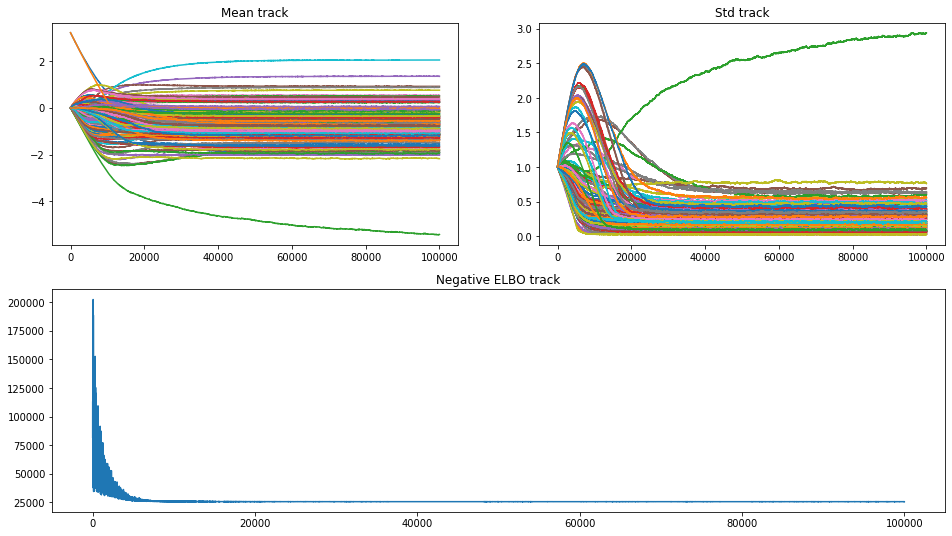

In [52]:
fig = plt.figure(figsize=(16, 9))
mu_ax = fig.add_subplot(221)
std_ax = fig.add_subplot(222)
hist_ax = fig.add_subplot(212)
mu_ax.plot(tracker['mean'])
mu_ax.set_title('Mean track')
std_ax.plot(tracker['std'])
std_ax.set_title('Std track')
hist_ax.plot(fit.hist)
hist_ax.set_title('Negative ELBO track');

<Figure size 432x1152 with 0 Axes>

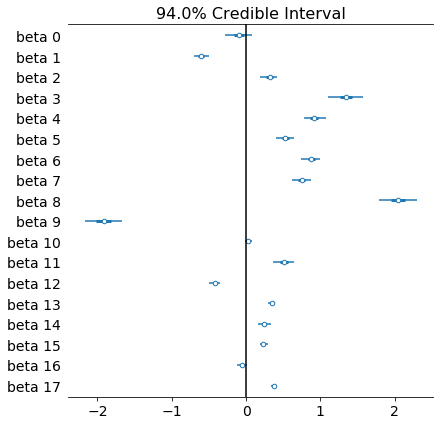

In [53]:
from pymc3 import forestplot
plt.figure(figsize=(6,16))
#forestplot(mean_field.sample(1000), kind='ridgeplot', colors='white', var_names=['beta']);
forestplot(fit.sample(1000), var_names=['beta']);
plt.axvline(x=0, color='black')

In [54]:
for i, var in enumerate(opera_cols):
    print('beta {}: {}'.format(i,var))

beta 0: logp_pred
beta 1: mp_pred
beta 2: bp_pred
beta 3: logvp_pred
beta 4: logws_pred
beta 5: loghl_pred
beta 6: rt_pred
beta 7: logkoa_pred
beta 8: logd55_pred
beta 9: logd74_pred
beta 10: logoh_pred
beta 11: logkoc_pred
beta 12: logbcf_pred
beta 13: biodeg_loghalflife_pred
beta 14: readybiodeg_pred
beta 15: logkm_pred
beta 16: fub_pred
beta 17: clint_pred


## Posterior predictive checks

#### Average across 500 sets of probablistic predictions

In [55]:
ppc = pm.sample_posterior_predictive(fit.sample(1000), samples= 500, model=osha_logistic_physical_biological)
avg_predictions = np.where(ppc['likelihood'].mean(axis=0) >= 0.5, 1, 0)

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
100%|██████████| 500/500 [00:07<00:00, 69.44it/s]


#### Classification accuracy metrics

In [56]:
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score
accuracy = accuracy_score(avg_predictions, indexed_osha['detected'])
auc = roc_auc_score(avg_predictions, indexed_osha['detected'])
print('Training classification accuracy: {:.2f}'.format(accuracy))
print('Training ROC area under the curve: {:.2f}'.format(auc))

Training classification accuracy: 0.70
Training ROC area under the curve: 0.69


In [57]:
null_predictions = np.where(np.random.uniform(size=len(indexed_osha['detected'])) >
                                        indexed_osha['detected'].mean(),1,0)
null_accuracy = accuracy_score(null_predictions,indexed_osha['detected'])
null_auc = roc_auc_score(null_predictions, indexed_osha['detected'])
print('Null model training classification accuracy: {:.2f}'.format(null_accuracy))
print('Null model training ROC area under the curve: {:.2f}'.format(null_auc))

Null model training classification accuracy: 0.48
Null model training ROC area under the curve: 0.50


#### Actual vs predicted subsector detection frequency

In [58]:
subsector_probs = indexed_osha[['detected', 'index_ss']].copy()
subsector_probs['prob_predicted'] = avg_predictions
subsector_probs = subsector_probs.groupby('index_ss').mean()
subsector_counts = indexed_osha['index_ss'].value_counts()
#subsector_probs = subsector_probs[subsector_counts > 10] # drop subsectors with very few data points
r = np.corrcoef(subsector_probs['detected'], subsector_probs['prob_predicted'])[0,1]

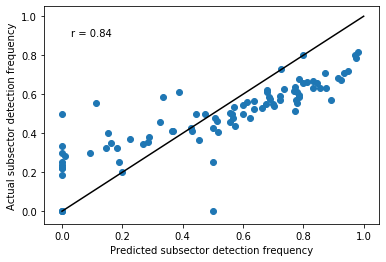

In [59]:
plt.scatter( subsector_probs['prob_predicted'], subsector_probs['detected'])
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('Predicted subsector detection frequency')
plt.ylabel('Actual subsector detection frequency')
plt.text(0.03, 0.9, 'r = {:.2f}'.format(r))
plt.show()

#### Test set accuracy

In [60]:
preds_test = indexed_osha_test[opera_cols]
detected_shared.set_value(indexed_osha_test.detected.values)
preds_shared.set_value(preds_test.as_matrix())
index_s_shared.set_value(indexed_osha_test.index_s.values)
index_ss_shared.set_value(indexed_osha_test.index_ss.values)

ppc_test = pm.sample_posterior_predictive(fit.sample(1000), samples= 500, model=osha_logistic_physical_biological)
avg_predictions_test = np.where(ppc_test['likelihood'].mean(axis=0) >= 0.5, 1, 0)

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
100%|██████████| 500/500 [00:05<00:00, 83.87it/s]


In [61]:
accuracy = accuracy_score(avg_predictions_test, indexed_osha_test['detected'])
null_predictions_test = np.where(np.random.uniform(size=len(indexed_osha_test['detected'])) >
                                        indexed_osha_test['detected'].mean(),1,0)
null_accuracy = accuracy_score(null_predictions_test,indexed_osha_test['detected'])
auc = roc_auc_score(avg_predictions_test, indexed_osha_test['detected'])
null_auc = roc_auc_score(null_predictions_test, indexed_osha_test['detected'])
print('Test classification accuracy: {:.2f}'.format(accuracy))
print('Null model test classification accuracy: {:.2f}'.format(null_accuracy))
print('Test ROC area under the curve: {:.2f}'.format(auc))
print('Null model test ROC area under the curve: {:.2f}'.format(null_auc))


Test classification accuracy: 0.70
Null model test classification accuracy: 0.46
Test ROC area under the curve: 0.68
Null model test ROC area under the curve: 0.49


/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


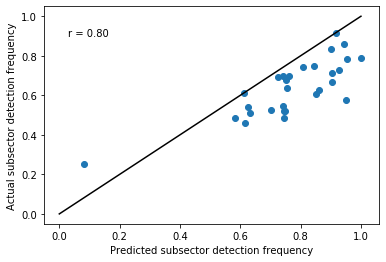

In [62]:
subsector_probs_test = indexed_osha_test[['detected', 'index_ss']].copy()
subsector_probs_test['prob_predicted'] = avg_predictions_test
subsector_probs_test = subsector_probs_test.groupby('index_ss').mean()
subsector_counts_test = indexed_osha_test['index_ss'].value_counts()
subsector_probs_test = subsector_probs_test[subsector_counts_test > 10] # drop subsectors with very few data points
r = np.corrcoef(subsector_probs_test['detected'], subsector_probs_test['prob_predicted'])[0,1]

plt.scatter(subsector_probs_test['prob_predicted'], subsector_probs_test['detected'])
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('Predicted subsector detection frequency')
plt.ylabel('Actual subsector detection frequency')
plt.text(0.03, 0.9, 'r = {:.2f}'.format(r))
plt.show()

### Opera abiotic + structural

In [90]:
opera = pd.read_csv('../../data/osha/chemical_metadata/opera2_physical_structural.csv')
opera

,PREFERRED_NAME,MoleculeID,LogP_pred,MP_pred,BP_pred,LogVP_pred,LogWS_pred,LogHL_pred,RT_pred,LogKOA_pred,...,nbHeteroRing,Sp3Sp2HybRatio,nbRotBd,nbHBdAcc,ndHBdDon,nbLipinskiFailures,TopoPolSurfAir,MolarRefract,CombDipolPolariz,MolWeight
0,"1,1,1,2-Tetrafluoroethane",DTXSID1021324,0.827040,-102.840618,-22.605931,3.539329,-2.918477,-1.308825,1.077754,0.036410,...,0,1.000000,1,0,0,0,0.00,12.0193,-0.020,102.009263
1,"1,1,1-Trichloro-2,2,2-trifluoroethane",DTXSID5027148,2.577394,-15.002823,48.806711,2.765054,-2.226180,-0.825878,11.526084,2.294088,...,0,1.000000,1,0,0,0,0.00,27.3736,0.089,185.901768
2,"1,2-Difluoro-1,1,2,2-tetrachloroethane",DTXSID5026091,3.042323,24.586119,91.183236,1.878533,-3.075882,-0.782740,12.076823,3.710297,...,0,1.000000,1,0,0,0,0.00,32.2084,0.363,201.872217
3,"1,1,2,2-Tetrachloroethane",DTXSID7021318,2.350099,-39.864348,147.582052,0.862776,-1.754303,-3.300416,10.683509,3.464204,...,0,1.000000,1,0,0,0,0.00,30.7638,0.577,165.891061
4,"1,1,2-Trichloro-1,2,2-trifluoroethane",DTXSID6021377,2.966338,-44.225351,50.560073,2.682974,-2.994329,-1.081953,8.322817,2.818690,...,0,1.000000,1,0,0,0,0.00,27.3736,0.239,185.901768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,4-Vinyl-1-cyclohexene dioxide,DTXSID0020604,0.670876,75.401822,221.813643,-1.583812,-0.246298,-4.695892,6.542498,4.306213,...,2,1.000000,1,2,0,0,25.06,32.7621,0.791,140.083730
729,"1,1-Dichloroethylene",DTXSID8021438,2.146029,-92.054831,41.134842,2.521820,-1.435674,-2.074198,0.000000,2.597997,...,0,0.000000,0,0,0,0,0.00,20.4606,0.457,95.953355
730,Oxamyl,DTXSID6021086,-0.537842,100.495968,306.162430,-3.848174,-0.203799,-9.882354,2.713181,9.225506,...,0,0.571429,6,4,1,0,96.30,53.0132,1.644,219.067762
731,Warfarin,DTXSID5023742,2.688832,162.602197,398.372135,-7.143559,-4.253120,-8.942250,16.801856,10.660081,...,1,0.210526,4,3,0,0,60.44,34.1518,2.985,308.104859


In [91]:
from sklearn.preprocessing import scale

opera = opera.drop(columns=['MoleculeID'])
#chem_data[chem_data.columns[8:]] = chem_data[chem_data.columns[8:]].apply(pd.to_numeric,errors='coerce')
opera.columns = [x.lower() for x in opera.columns]
opera_cols =  opera.columns[1:]
opera_s = opera.copy()
center_scale_cols =  [x for x in opera_cols.tolist() if not x.startswith('nb') and not x.startswith('nd')]
opera_s[center_scale_cols] =  scale(opera_s[center_scale_cols])  # center and scale opera predictors

In [92]:
#opera_s = opera_s.drop(columns=['octanol_air_partition_coeff_logkoa_opera_pred','melting_point_degc_opera_pred']) # drop highly correlated predictors
opera_cols = opera_s.columns.tolist()
opera_cols.remove('preferred_name')

chem_osha = osha.merge(opera_s, left_on='preferred_name', right_on='preferred_name')
chem_osha = chem_osha.dropna(subset=opera_cols)  # drop rows missing opera predictions
osha_enc = chem_osha.dropna(subset=['subsector_name'])
osha_enc = osha_enc.drop(osha_enc[osha_enc['subsector_name']=='Undefined/Multiple'].index)
osha_enc['sector_enc'] = osha_enc['sector_name'].astype('category').cat.codes  # re-factor
osha_enc['subsector_enc'] = osha_enc ['subsector_name'].astype('category').cat.codes  # re-factor
len(osha_enc.sector_name.value_counts()), len(osha_enc.subsector_name.value_counts())

(20, 91)

In [96]:
#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(interaction_only=True, include_bias=False)
#opera_s_ints = poly.fit_transform(osha_enc[opera_cols])
#opera_cols_ints = poly.get_feature_names()[10:]
#opera_interactions = pd.DataFrame(opera_s_ints[:,10:], columns=opera_cols_ints, index=osha_enc.index)
#osha_enc = osha_enc.join(opera_interactions)

In [94]:
sector_index = osha_enc.groupby(['sector_name']).all().reset_index().reset_index()[['index', 'sector_name']]
sector_subsector_index = osha_enc.groupby(['sector_name', 'subsector_name']).all().reset_index().reset_index()[['index', 'sector_name', 'subsector_name']]
sector_subsector_indexes_df = pd.merge(sector_index, sector_subsector_index, how='inner', on='sector_name', suffixes=('_s', '_ss'))
indexed_osha = pd.merge(osha_enc, sector_subsector_indexes_df, how = 'inner', on=['sector_name', 'subsector_name']).reset_index()

sector_indexes = sector_index['index'].values
sector_count = len(sector_indexes)
sector_subsector_indexes = sector_subsector_indexes_df['index_ss'].values
sector_subsector_count = len(sector_subsector_indexes)

#from sklearn.model_selection import train_test_split
#indexed_osha, indexed_osha_test = train_test_split(indexed_osha, test_size=0.1, random_state=5757)  # training/test dataset split completely random

indexed_osha_test = indexed_osha[indexed_osha['date_sampled'].isin(['1990','1995','2005' '2015'])]  # training/test dataset split by year
indexed_osha = indexed_osha[~(indexed_osha['date_sampled'].isin(['1990','1995','2005' '2015']))]

In [96]:
preds = indexed_osha[opera_cols]
npreds = len(opera_cols)

from theano import tensor as tt
from theano import shared

detected_shared = shared(indexed_osha.detected.values)
preds_shared = shared(preds.as_matrix())
index_s_shared = shared(indexed_osha.index_s.values)
index_ss_shared = shared(indexed_osha.index_ss.values)


with pm.Model() as osha_logistic_physical_structural:
    
    global_mu = pm.StudentT('global_mu', nu=5, mu=0, sigma=10)
    global_lam = pm.HalfCauchy('global_lam',beta=25)
    
    sector_int_mu = pm.StudentT("sector_int_mu",nu = 5, mu = global_mu, sigma=global_lam, shape=sector_count)

    sigma_subsector_int = pm.HalfCauchy('sigma_subsector_int',beta=25)
    
    subsector_int = pm.StudentT("subsector_int", 1, mu=sector_int_mu[sector_subsector_indexes_df['index_s']],
                          sigma=sigma_subsector_int, shape=sector_subsector_count)
    beta = pm.StudentT('beta',nu=5,mu=0,sigma=2.5, shape=(npreds))  # recommended by stan wiki, Gelman et al 2008
    μ = subsector_int[index_ss_shared] + tt.dot(preds_shared,beta)
    
    θ = pm.Deterministic('θ',pm.math.sigmoid(μ))
    
    like = pm.Bernoulli(
        'likelihood',
        p = θ,
        observed=detected_shared
    )

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [97]:
with osha_logistic_all:
    fr_advi = pm.FullRankADVI()
tracker = pm.callbacks.Tracker(
    mean=fr_advi.approx.mean.eval,  # callable that returns mean
    std=fr_advi.approx.std.eval  # callable that returns std
)
fit = fr_advi.fit(100000, callbacks=[pm.callbacks.CheckParametersConvergence(), tracker])
#fit = fr_advi.fit(50000, callbacks=[pm.callbacks.CheckParametersConvergence(), tracker])


  0%|          | 0/100000 [00:00<?, ?it/s]/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Average Loss = 29,583: 100%|██████████| 100000/100000 [13:17<00:00, 125.39it/s]
Finished [100%]: Average Loss = 29,554


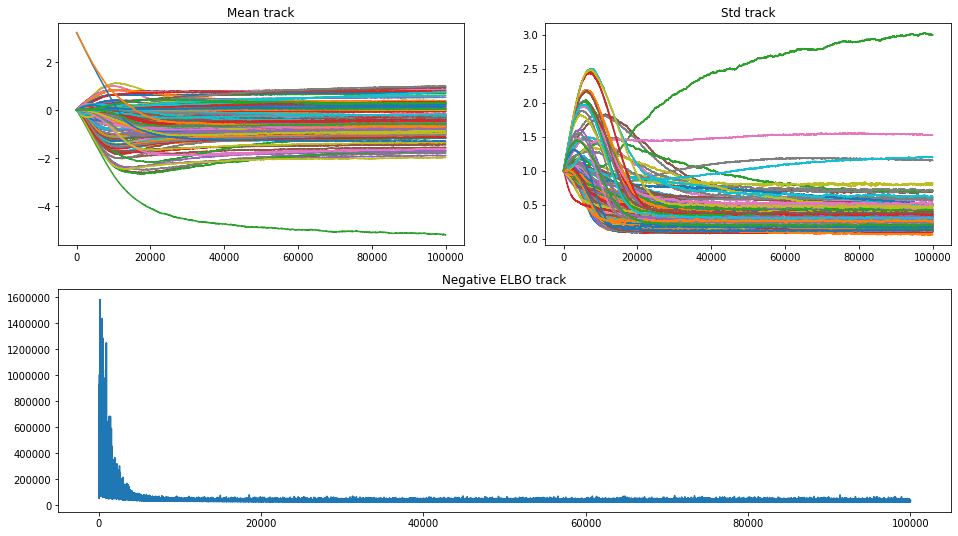

In [98]:
fig = plt.figure(figsize=(16, 9))
mu_ax = fig.add_subplot(221)
std_ax = fig.add_subplot(222)
hist_ax = fig.add_subplot(212)
mu_ax.plot(tracker['mean'])
mu_ax.set_title('Mean track')
std_ax.plot(tracker['std'])
std_ax.set_title('Std track')
hist_ax.plot(fit.hist)
hist_ax.set_title('Negative ELBO track');

<Figure size 432x1152 with 0 Axes>

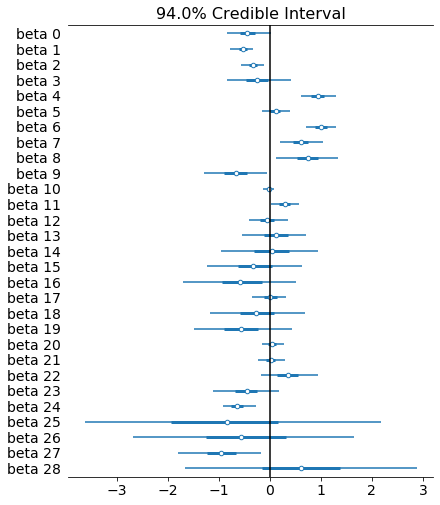

In [99]:
from pymc3 import forestplot
plt.figure(figsize=(6,16))
#forestplot(mean_field.sample(1000), kind='ridgeplot', colors='white', var_names=['beta']);
forestplot(fit.sample(1000), var_names=['beta']);
plt.axvline(x=0, color='black')

In [100]:
for i, var in enumerate(opera_cols):
    print('beta {}: {}'.format(i,var))

beta 0: logp_pred
beta 1: mp_pred
beta 2: bp_pred
beta 3: logvp_pred
beta 4: logws_pred
beta 5: loghl_pred
beta 6: rt_pred
beta 7: logkoa_pred
beta 8: logd55_pred
beta 9: logd74_pred
beta 10: logoh_pred
beta 11: logkoc_pred
beta 12: nbatoms
beta 13: nbheavyatoms
beta 14: nbc
beta 15: nbo
beta 16: nbn
beta 17: nbaromatom
beta 18: nbring
beta 19: nbheteroring
beta 20: sp3sp2hybratio
beta 21: nbrotbd
beta 22: nbhbdacc
beta 23: ndhbddon
beta 24: nblipinskifailures
beta 25: topopolsurfair
beta 26: molarrefract
beta 27: combdipolpolariz
beta 28: molweight


## Posterior predictive checks

#### Average across 500 sets of probablistic predictions

In [101]:
ppc = pm.sample_posterior_predictive(fit.sample(1000), samples= 500, model=osha_logistic_physical_structural)
avg_predictions = np.where(ppc['likelihood'].mean(axis=0) >= 0.5, 1, 0)

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
100%|██████████| 500/500 [00:07<00:00, 67.33it/s]


#### Classification accuracy metrics

In [102]:
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score
accuracy = accuracy_score(avg_predictions, indexed_osha['detected'])
auc = roc_auc_score(avg_predictions, indexed_osha['detected'])
print('Training classification accuracy: {:.2f}'.format(accuracy))
print('Training ROC area under the curve: {:.2f}'.format(auc))

Training classification accuracy: 0.70
Training ROC area under the curve: 0.70


In [103]:
null_predictions = np.where(np.random.uniform(size=len(indexed_osha['detected'])) >
                                        indexed_osha['detected'].mean(),1,0)
null_accuracy = accuracy_score(null_predictions,indexed_osha['detected'])
null_auc = roc_auc_score(null_predictions, indexed_osha['detected'])
print('Null model training classification accuracy: {:.2f}'.format(null_accuracy))
print('Null model training ROC area under the curve: {:.2f}'.format(null_auc))

Null model training classification accuracy: 0.47
Null model training ROC area under the curve: 0.50


#### Actual vs predicted subsector detection frequency

In [104]:
subsector_probs = indexed_osha[['detected', 'index_ss']].copy()
subsector_probs['prob_predicted'] = avg_predictions
subsector_probs = subsector_probs.groupby('index_ss').mean()
subsector_counts = indexed_osha['index_ss'].value_counts()
#subsector_probs = subsector_probs[subsector_counts > 10] # drop subsectors with very few data points
r = np.corrcoef(subsector_probs['detected'], subsector_probs['prob_predicted'])[0,1]

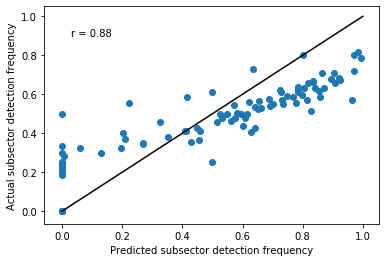

In [105]:
plt.scatter( subsector_probs['prob_predicted'], subsector_probs['detected'])
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('Predicted subsector detection frequency')
plt.ylabel('Actual subsector detection frequency')
plt.text(0.03, 0.9, 'r = {:.2f}'.format(r))
plt.show()

#### Test set accuracy

In [106]:
preds_test = indexed_osha_test[opera_cols]
detected_shared.set_value(indexed_osha_test.detected.values)
preds_shared.set_value(preds_test.as_matrix())
index_s_shared.set_value(indexed_osha_test.index_s.values)
index_ss_shared.set_value(indexed_osha_test.index_ss.values)

ppc_test = pm.sample_posterior_predictive(fit.sample(1000), samples= 500, model=osha_logistic_physical_structural)
avg_predictions_test = np.where(ppc_test['likelihood'].mean(axis=0) >= 0.5, 1, 0)

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
100%|██████████| 500/500 [00:06<00:00, 78.28it/s]


In [107]:
accuracy = accuracy_score(avg_predictions_test, indexed_osha_test['detected'])
null_predictions_test = np.where(np.random.uniform(size=len(indexed_osha_test['detected'])) >
                                        indexed_osha_test['detected'].mean(),1,0)
null_accuracy = accuracy_score(null_predictions_test,indexed_osha_test['detected'])
auc = roc_auc_score(avg_predictions_test, indexed_osha_test['detected'])
null_auc = roc_auc_score(null_predictions_test, indexed_osha_test['detected'])
print('Test classification accuracy: {:.2f}'.format(accuracy))
print('Null model test classification accuracy: {:.2f}'.format(null_accuracy))
print('Test ROC area under the curve: {:.2f}'.format(auc))
print('Null model test ROC area under the curve: {:.2f}'.format(null_auc))


Test classification accuracy: 0.70
Null model test classification accuracy: 0.46
Test ROC area under the curve: 0.69
Null model test ROC area under the curve: 0.50


/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


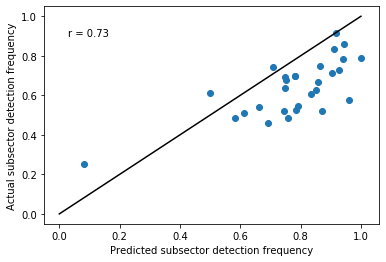

In [108]:
subsector_probs_test = indexed_osha_test[['detected', 'index_ss']].copy()
subsector_probs_test['prob_predicted'] = avg_predictions_test
subsector_probs_test = subsector_probs_test.groupby('index_ss').mean()
subsector_counts_test = indexed_osha_test['index_ss'].value_counts()
subsector_probs_test = subsector_probs_test[subsector_counts_test > 10] # drop subsectors with very few data points
r = np.corrcoef(subsector_probs_test['detected'], subsector_probs_test['prob_predicted'])[0,1]

plt.scatter(subsector_probs_test['prob_predicted'], subsector_probs_test['detected'])
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('Predicted subsector detection frequency')
plt.ylabel('Actual subsector detection frequency')
plt.text(0.03, 0.9, 'r = {:.2f}'.format(r))
plt.show()

### Opera abiotic + biotic + structural

In [64]:
opera = pd.read_csv('../../data/osha/chemical_metadata/opera2_all.csv')
opera

,PREFERRED_NAME,MoleculeID,LogP_pred,MP_pred,BP_pred,LogVP_pred,LogWS_pred,LogHL_pred,RT_pred,LogKOA_pred,...,TopoPolSurfAir,MolarRefract,CombDipolPolariz,MolWeight,LogBCF_pred,BioDeg_LogHalfLife_pred,ReadyBiodeg_pred,LogKM_pred,FUB_pred,Clint_pred
0,"1,1,1,2-Tetrafluoroethane",DTXSID1021324,0.827040,-102.840618,-22.605931,3.539329,-2.918477,-1.308825,1.077754,0.036410,...,0.00,12.0193,-0.020,102.009263,1.140721,0.879337,1.0,-1.018823,0.938953,1.126115
1,"1,1,1-Trichloro-2,2,2-trifluoroethane",DTXSID5027148,2.577394,-15.002823,48.806711,2.765054,-2.226180,-0.825878,11.526084,2.294088,...,0.00,27.3736,0.089,185.901768,1.219245,0.879336,0.0,1.100178,0.682392,1.053753
2,"1,2-Difluoro-1,1,2,2-tetrachloroethane",DTXSID5026091,3.042323,24.586119,91.183236,1.878533,-3.075882,-0.782740,12.076823,3.710297,...,0.00,32.2084,0.363,201.872217,1.651911,1.147999,0.0,0.680101,0.505783,1.127796
3,"1,1,2,2-Tetrachloroethane",DTXSID7021318,2.350099,-39.864348,147.582052,0.862776,-1.754303,-3.300416,10.683509,3.464204,...,0.00,30.7638,0.577,165.891061,1.071377,1.162160,0.0,-0.678153,0.101371,1.049232
4,"1,1,2-Trichloro-1,2,2-trifluoroethane",DTXSID6021377,2.966338,-44.225351,50.560073,2.682974,-2.994329,-1.081953,8.322817,2.818690,...,0.00,27.3736,0.239,185.901768,1.624601,0.670627,0.0,1.087855,0.872214,1.053753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,4-Vinyl-1-cyclohexene dioxide,DTXSID0020604,0.670876,75.401822,221.813643,-1.583812,-0.246298,-4.695892,6.542498,4.306213,...,25.06,32.7621,0.791,140.083730,0.544835,0.563320,0.0,-0.845404,0.752539,-4.002069
729,"1,1-Dichloroethylene",DTXSID8021438,2.146029,-92.054831,41.134842,2.521820,-1.435674,-2.074198,0.000000,2.597997,...,0.00,20.4606,0.457,95.953355,1.036647,0.901319,0.0,-0.756178,0.342199,1.094112
730,Oxamyl,DTXSID6021086,-0.537842,100.495968,306.162430,-3.848174,-0.203799,-9.882354,2.713181,9.225506,...,96.30,53.0132,1.644,219.067762,0.330434,0.668337,0.0,-1.028647,0.807243,-6.611441
731,Warfarin,DTXSID5023742,2.688832,162.602197,398.372135,-7.143559,-4.253120,-8.942250,16.801856,10.660081,...,60.44,34.1518,2.985,308.104859,1.250233,0.525285,0.0,-0.388300,0.014048,-5.274753


In [65]:
from sklearn.preprocessing import scale

opera = opera.drop(columns=['MoleculeID'])
#chem_data[chem_data.columns[8:]] = chem_data[chem_data.columns[8:]].apply(pd.to_numeric,errors='coerce')
opera.columns = [x.lower() for x in opera.columns]
opera_cols =  opera.columns[1:]
opera_s = opera.copy()
center_scale_cols =  [x for x in opera_cols.tolist() if not x.startswith('nb') and not x.startswith('nd')]
center_scale_cols.remove('readybiodeg_pred')
opera_s[center_scale_cols] =  scale(opera_s[center_scale_cols])  # center and scale opera predictors

In [67]:
#opera_s = opera_s.drop(columns=['octanol_air_partition_coeff_logkoa_opera_pred','melting_point_degc_opera_pred']) # drop highly correlated predictors
opera_cols = opera_s.columns.tolist()
opera_cols.remove('preferred_name')

chem_osha = osha.merge(opera_s, left_on='preferred_name', right_on='preferred_name')
chem_osha = chem_osha.dropna(subset=opera_cols)  # drop rows missing opera predictions
osha_enc = chem_osha.dropna(subset=['subsector_name'])
osha_enc = osha_enc.drop(osha_enc[osha_enc['subsector_name']=='Undefined/Multiple'].index)
osha_enc['sector_enc'] = osha_enc['sector_name'].astype('category').cat.codes  # re-factor
osha_enc['subsector_enc'] = osha_enc ['subsector_name'].astype('category').cat.codes  # re-factor
len(osha_enc.sector_name.value_counts()), len(osha_enc.subsector_name.value_counts())

(20, 91)

In [96]:
#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(interaction_only=True, include_bias=False)
#opera_s_ints = poly.fit_transform(osha_enc[opera_cols])
#opera_cols_ints = poly.get_feature_names()[10:]
#opera_interactions = pd.DataFrame(opera_s_ints[:,10:], columns=opera_cols_ints, index=osha_enc.index)
#osha_enc = osha_enc.join(opera_interactions)

In [69]:
sector_index = osha_enc.groupby(['sector_name']).all().reset_index().reset_index()[['index', 'sector_name']]
sector_subsector_index = osha_enc.groupby(['sector_name', 'subsector_name']).all().reset_index().reset_index()[['index', 'sector_name', 'subsector_name']]
sector_subsector_indexes_df = pd.merge(sector_index, sector_subsector_index, how='inner', on='sector_name', suffixes=('_s', '_ss'))
indexed_osha = pd.merge(osha_enc, sector_subsector_indexes_df, how = 'inner', on=['sector_name', 'subsector_name']).reset_index()

sector_indexes = sector_index['index'].values
sector_count = len(sector_indexes)
sector_subsector_indexes = sector_subsector_indexes_df['index_ss'].values
sector_subsector_count = len(sector_subsector_indexes)

#from sklearn.model_selection import train_test_split
#indexed_osha, indexed_osha_test = train_test_split(indexed_osha, test_size=0.1, random_state=5757)  # training/test dataset split completely random

indexed_osha_test = indexed_osha[indexed_osha['date_sampled'].isin(['1990','1995','2005' '2015'])]  # training/test dataset split by year
indexed_osha = indexed_osha[~(indexed_osha['date_sampled'].isin(['1990','1995','2005' '2015']))]

In [72]:
preds = indexed_osha[opera_cols]
npreds = len(opera_cols)

from theano import tensor as tt
from theano import shared

detected_shared = shared(indexed_osha.detected.values)
preds_shared = shared(preds.as_matrix())
index_s_shared = shared(indexed_osha.index_s.values)
index_ss_shared = shared(indexed_osha.index_ss.values)


with pm.Model() as osha_logistic_all:
    
    global_mu = pm.StudentT('global_mu', nu=5, mu=0, sigma=10)
    global_lam = pm.HalfCauchy('global_lam',beta=25)
    
    sector_int_mu = pm.StudentT("sector_int_mu",nu = 5, mu = global_mu, sigma=global_lam, shape=sector_count)

    sigma_subsector_int = pm.HalfCauchy('sigma_subsector_int',beta=25)
    
    subsector_int = pm.StudentT("subsector_int", 1, mu=sector_int_mu[sector_subsector_indexes_df['index_s']],
                          sigma=sigma_subsector_int, shape=sector_subsector_count)
    beta = pm.StudentT('beta',nu=5,mu=0,sigma=2.5, shape=(npreds))  # recommended by stan wiki, Gelman et al 2008
    μ = subsector_int[index_ss_shared] + tt.dot(preds_shared,beta)
    
    θ = pm.Deterministic('θ',pm.math.sigmoid(μ))
    
    like = pm.Bernoulli(
        'likelihood',
        p = θ,
        observed=detected_shared
    )

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [74]:
with osha_logistic_all:
    fr_advi = pm.FullRankADVI()
tracker = pm.callbacks.Tracker(
    mean=fr_advi.approx.mean.eval,  # callable that returns mean
    std=fr_advi.approx.std.eval  # callable that returns std
)
fit = fr_advi.fit(100000, callbacks=[pm.callbacks.CheckParametersConvergence(), tracker])
#fit = fr_advi.fit(50000, callbacks=[pm.callbacks.CheckParametersConvergence(), tracker])


  0%|          | 0/100000 [00:00<?, ?it/s]/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Average Loss = 26,146: 100%|██████████| 100000/100000 [13:35<00:00, 122.62it/s]
Finished [100%]: Average Loss = 26,140


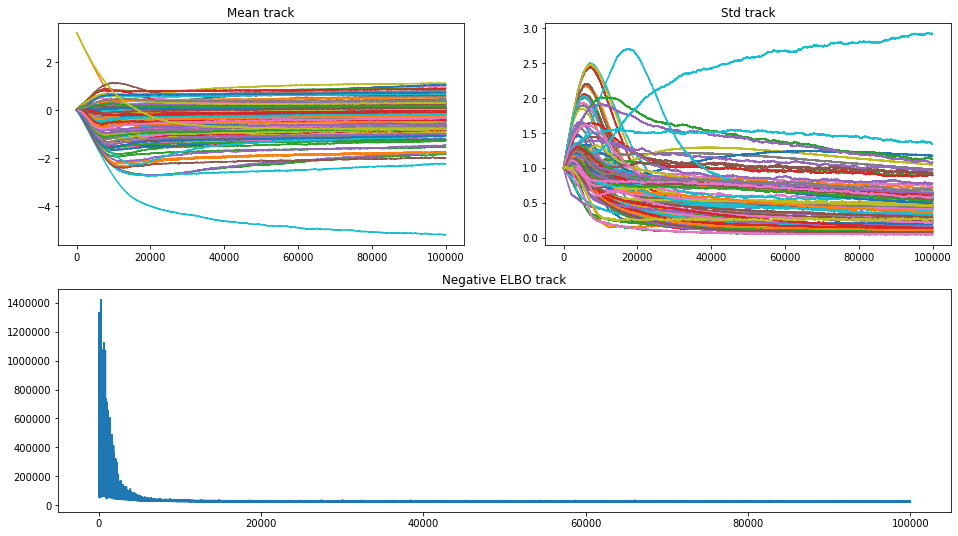

In [75]:
fig = plt.figure(figsize=(16, 9))
mu_ax = fig.add_subplot(221)
std_ax = fig.add_subplot(222)
hist_ax = fig.add_subplot(212)
mu_ax.plot(tracker['mean'])
mu_ax.set_title('Mean track')
std_ax.plot(tracker['std'])
std_ax.set_title('Std track')
hist_ax.plot(fit.hist)
hist_ax.set_title('Negative ELBO track');

<Figure size 432x1152 with 0 Axes>

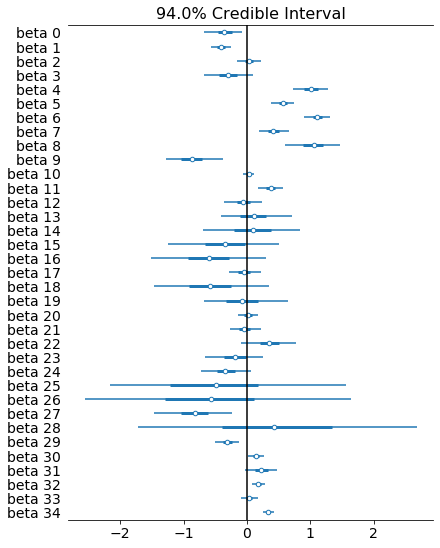

In [76]:
from pymc3 import forestplot
plt.figure(figsize=(6,16))
#forestplot(mean_field.sample(1000), kind='ridgeplot', colors='white', var_names=['beta']);
forestplot(fit.sample(1000), var_names=['beta']);
plt.axvline(x=0, color='black')

In [77]:
for i, var in enumerate(opera_cols):
    print('beta {}: {}'.format(i,var))

beta 0: logp_pred
beta 1: mp_pred
beta 2: bp_pred
beta 3: logvp_pred
beta 4: logws_pred
beta 5: loghl_pred
beta 6: rt_pred
beta 7: logkoa_pred
beta 8: logd55_pred
beta 9: logd74_pred
beta 10: logoh_pred
beta 11: logkoc_pred
beta 12: nbatoms
beta 13: nbheavyatoms
beta 14: nbc
beta 15: nbo
beta 16: nbn
beta 17: nbaromatom
beta 18: nbring
beta 19: nbheteroring
beta 20: sp3sp2hybratio
beta 21: nbrotbd
beta 22: nbhbdacc
beta 23: ndhbddon
beta 24: nblipinskifailures
beta 25: topopolsurfair
beta 26: molarrefract
beta 27: combdipolpolariz
beta 28: molweight
beta 29: logbcf_pred
beta 30: biodeg_loghalflife_pred
beta 31: readybiodeg_pred
beta 32: logkm_pred
beta 33: fub_pred
beta 34: clint_pred


## Posterior predictive checks

#### Average across 500 sets of probablistic predictions

In [78]:
ppc = pm.sample_posterior_predictive(fit.sample(1000), samples= 500, model=osha_logistic_all)
avg_predictions = np.where(ppc['likelihood'].mean(axis=0) >= 0.5, 1, 0)

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
100%|██████████| 500/500 [00:07<00:00, 70.94it/s]


#### Classification accuracy metrics

In [79]:
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score
accuracy = accuracy_score(avg_predictions, indexed_osha['detected'])
auc = roc_auc_score(avg_predictions, indexed_osha['detected'])
print('Training classification accuracy: {:.2f}'.format(accuracy))
print('Training ROC area under the curve: {:.2f}'.format(auc))

Training classification accuracy: 0.71
Training ROC area under the curve: 0.70


In [80]:
null_predictions = np.where(np.random.uniform(size=len(indexed_osha['detected'])) >
                                        indexed_osha['detected'].mean(),1,0)
null_accuracy = accuracy_score(null_predictions,indexed_osha['detected'])
null_auc = roc_auc_score(null_predictions, indexed_osha['detected'])
print('Null model training classification accuracy: {:.2f}'.format(null_accuracy))
print('Null model training ROC area under the curve: {:.2f}'.format(null_auc))

Null model training classification accuracy: 0.47
Null model training ROC area under the curve: 0.50


#### Actual vs predicted subsector detection frequency

In [81]:
subsector_probs = indexed_osha[['detected', 'index_ss']].copy()
subsector_probs['prob_predicted'] = avg_predictions
subsector_probs = subsector_probs.groupby('index_ss').mean()
subsector_counts = indexed_osha['index_ss'].value_counts()
#subsector_probs = subsector_probs[subsector_counts > 10] # drop subsectors with very few data points
r = np.corrcoef(subsector_probs['detected'], subsector_probs['prob_predicted'])[0,1]

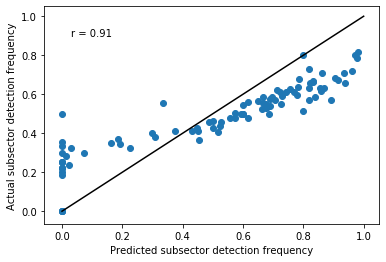

In [82]:
plt.scatter( subsector_probs['prob_predicted'], subsector_probs['detected'])
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('Predicted subsector detection frequency')
plt.ylabel('Actual subsector detection frequency')
plt.text(0.03, 0.9, 'r = {:.2f}'.format(r))
plt.show()

#### Test set accuracy

In [83]:
preds_test = indexed_osha_test[opera_cols]
detected_shared.set_value(indexed_osha_test.detected.values)
preds_shared.set_value(preds_test.as_matrix())
index_s_shared.set_value(indexed_osha_test.index_s.values)
index_ss_shared.set_value(indexed_osha_test.index_ss.values)

ppc_test = pm.sample_posterior_predictive(fit.sample(1000), samples= 500, model=osha_logistic_all)
avg_predictions_test = np.where(ppc_test['likelihood'].mean(axis=0) >= 0.5, 1, 0)

/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
100%|██████████| 500/500 [00:05<00:00, 92.11it/s]


In [84]:
accuracy = accuracy_score(avg_predictions_test, indexed_osha_test['detected'])
null_predictions_test = np.where(np.random.uniform(size=len(indexed_osha_test['detected'])) >
                                        indexed_osha_test['detected'].mean(),1,0)
null_accuracy = accuracy_score(null_predictions_test,indexed_osha_test['detected'])
auc = roc_auc_score(avg_predictions_test, indexed_osha_test['detected'])
null_auc = roc_auc_score(null_predictions_test, indexed_osha_test['detected'])
print('Test classification accuracy: {:.2f}'.format(accuracy))
print('Null model test classification accuracy: {:.2f}'.format(null_accuracy))
print('Test ROC area under the curve: {:.2f}'.format(auc))
print('Null model test ROC area under the curve: {:.2f}'.format(null_auc))


Test classification accuracy: 0.70
Null model test classification accuracy: 0.47
Test ROC area under the curve: 0.68
Null model test ROC area under the curve: 0.51


/home/jminucci/anaconda3/envs/occupation/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


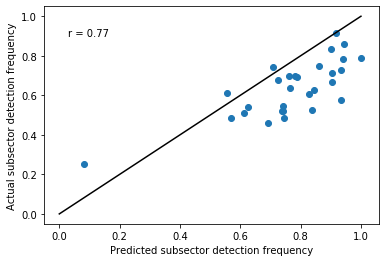

In [85]:
subsector_probs_test = indexed_osha_test[['detected', 'index_ss']].copy()
subsector_probs_test['prob_predicted'] = avg_predictions_test
subsector_probs_test = subsector_probs_test.groupby('index_ss').mean()
subsector_counts_test = indexed_osha_test['index_ss'].value_counts()
subsector_probs_test = subsector_probs_test[subsector_counts_test > 10] # drop subsectors with very few data points
r = np.corrcoef(subsector_probs_test['detected'], subsector_probs_test['prob_predicted'])[0,1]

plt.scatter(subsector_probs_test['prob_predicted'], subsector_probs_test['detected'])
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('Predicted subsector detection frequency')
plt.ylabel('Actual subsector detection frequency')
plt.text(0.03, 0.9, 'r = {:.2f}'.format(r))
plt.show()